In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [72]:
df = pd.read_csv("weatherAUS.csv")


In [73]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [75]:
df.shape

(145460, 23)

In [76]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df.nunique()

,0
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


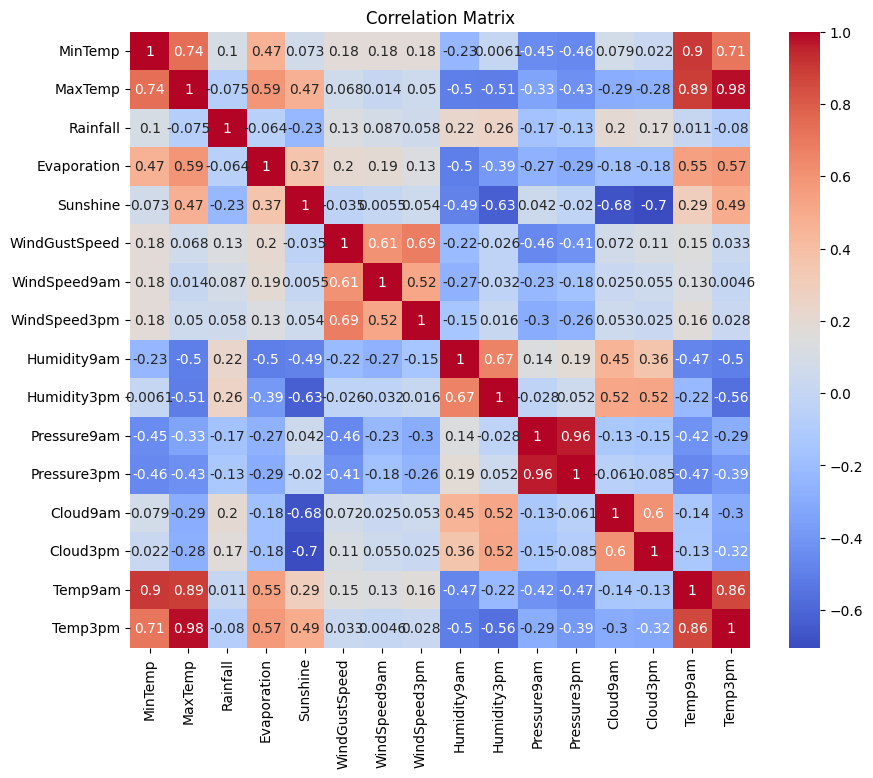

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [80]:
# Drop columns with excessive nulls
df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], inplace=True)


In [81]:
df.shape

(145460, 19)

In [82]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-82-6494a791493d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [83]:
df.dropna(inplace=True)


In [84]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [85]:
df.RainTomorrow.value_counts()

,count
RainTomorrow,
No,94194
Yes,26187


In [86]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [87]:
df['Year'] = df['Date'].dt.year

In [88]:
rain_by_year = df[df['RainTomorrow'] == 'Yes'].groupby('Year').size()

In [89]:
print(rain_by_year.sort_values(ascending=False))

Year
2016    3429
2010    3390
2011    3085
2009    2967
2013    2938
2014    2893
2015    2876
2012    2788
2017    1428
2008     374
2007      19
dtype: int64


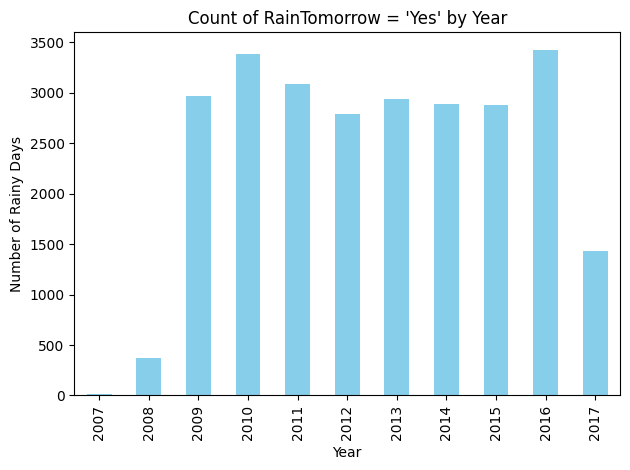

In [90]:
import matplotlib.pyplot as plt

rain_by_year.plot(kind='bar', color='skyblue')
plt.title("Count of RainTomorrow = 'Yes' by Year")
plt.xlabel("Year")
plt.ylabel("Number of Rainy Days")
plt.tight_layout()
plt.show()


In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [93]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,2008-12-01,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008
1,2008-12-02,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008
2,2008-12-03,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008
3,2008-12-04,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008
4,2008-12-05,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008


In [94]:
# Prepairing attributes of scale data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
features = df.drop(['RainTomorrow', 'Date'], axis=1) # dropping target and extra columns

target = df['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,120381.0,3.777567e-17,1.000004,-1.651426,-0.874282,-0.019423,0.835435,1.690294
MinTemp,120381.0,4.910838e-16,1.000004,-3.235751,-0.721301,-0.045543,0.724508,3.380396
MaxTemp,120381.0,-5.213043e-16,1.000004,-2.990476,-0.770915,-0.083567,0.718339,3.525010
Rainfall,120381.0,9.443919e-18,1.000004,-0.274739,-0.274739,-0.274739,-0.203927,43.109364
WindGustDir,120381.0,8.688405e-17,1.000004,-1.649108,-1.007193,0.062666,0.918553,1.560468
WindGustSpeed,120381.0,-2.368063e-16,1.000004,-2.529866,-0.676295,-0.083153,0.584133,7.034558
WindDir9am,120381.0,-3.399811e-17,1.000004,-1.548687,-0.886429,-0.003418,0.879593,1.762604
WindDir3pm,120381.0,-6.421865e-17,1.000004,-1.686753,-0.817146,0.052461,0.922068,1.574273
WindSpeed9am,120381.0,6.421865e-17,1.000004,-1.632594,-0.837682,-0.156328,0.638584,8.247028
WindSpeed3pm,120381.0,-9.585577e-17,1.000004,-2.199343,-0.701404,-0.010048,0.566082,7.825320


In [95]:
from sklearn.model_selection import train_test_split

# Assuming your features are in X and target in y
# X = df.drop('target_column', axis=1)
# y = df['target_column']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

In [96]:
#Early stopping
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [98]:
# Initialising the NN
model = Sequential()

In [99]:
# layers
from tensorflow.keras.layers import Dropout

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
# Compiling the ANN
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [101]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(input_dim,)))  # input_shape should be (18,) here
# add more layers...


In [102]:
print(X_train.shape)  # should print (num_samples, 18)


(96304, 18)


In [103]:
input_dim = X_train.shape[1]  # 18 in your case

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
# Add more layers
model.add(Dense(1, activation='sigmoid'))  # for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [104]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2408/2408 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8339 - loss: 0.3836 - val_accuracy: 0.8501 - val_loss: 0.3491
Epoch 2/150
2408/2408 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8553 - loss: 0.3395 - val_accuracy: 0.8510 - val_loss: 0.3454
Epoch 3/150
2408/2408 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8551 - loss: 0.3371 - val_accuracy: 0.8523 - val_loss: 0.3419
Epoch 4/150
2408/2408 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8572 - loss: 0.3355 - val_accuracy: 0.8532 - val_loss: 0.3414
Epoch 5/150
2408/2408 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8600 - loss: 0.3286 - val_accuracy: 0.8537 - val_loss: 0.3397
Epoch 6/150
2408/2408 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8579 - loss: 0.3341 - val_accuracy: 0.8522 - val_loss: 0.3401
Epoch 7/150
2408/2408 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8590 - loss: 0.3292 - val_accuracy: 0.8520 - val_loss: 0.3404
Epoch 8/150
2408/2408 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8594 - los

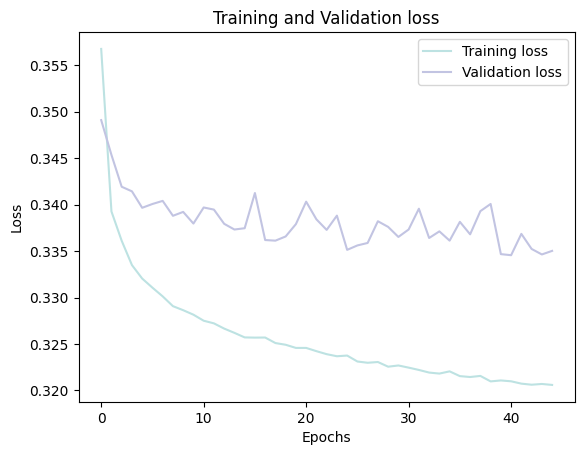

In [105]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

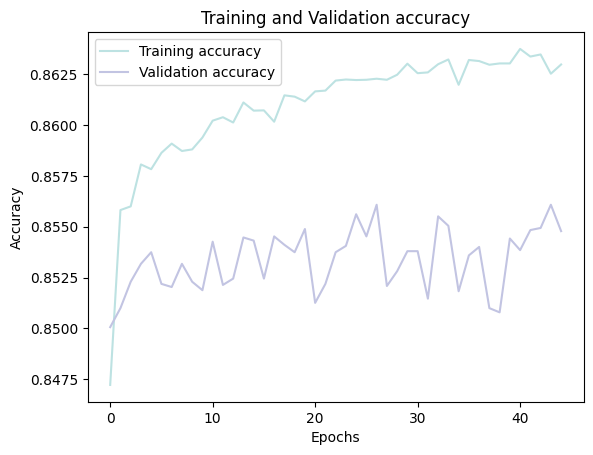

In [106]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [107]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8599 - loss: 0.3284
Test Accuracy: 85.83%
